In [84]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Reshape
import matplotlib.pyplot as plt

In [85]:
inputs = []
targets = []

In [86]:
for i in range(52):
    with open('data.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['roi']
        targets = targets + data['peak']

In [87]:
inputs = np.array(inputs)
targets = np.array(targets)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [89]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(20, 1)

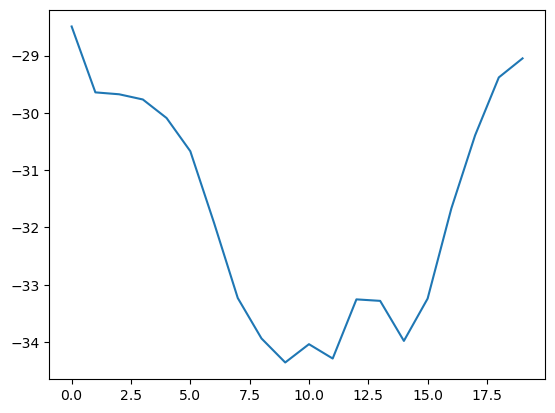

In [90]:
plt.plot(X_train[50])

In [91]:
model = Sequential()

model.add(Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=input_shape))

model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))

model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [92]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [93]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 18, 20)            80        
                                                                 
 conv1d_29 (Conv1D)          (None, 16, 16)            976       
                                                                 
 conv1d_30 (Conv1D)          (None, 14, 8)             392       
                                                                 
 flatten_9 (Flatten)         (None, 112)               0         
                                                                 
 dense_29 (Dense)            (None, 16)                1808      
                                                                 
 dense_30 (Dense)            (None, 8)                 136       
                                                                 
 dense_31 (Dense)            (None, 4)                

In [94]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=50, batch_size=32)

Epoch 1/50
746/746 [==============================] - 2s 2ms/step - loss: 0.8990 - binary_accuracy: 0.5471 - val_loss: 0.5927 - val_binary_accuracy: 0.9148
Epoch 2/50
746/746 [==============================] - 1s 2ms/step - loss: 0.5602 - binary_accuracy: 0.8984 - val_loss: 0.5248 - val_binary_accuracy: 0.9246
Epoch 3/50
746/746 [==============================] - 1s 2ms/step - loss: 0.5118 - binary_accuracy: 0.9274 - val_loss: 0.4886 - val_binary_accuracy: 0.9382
Epoch 4/50
746/746 [==============================] - 1s 2ms/step - loss: 0.4792 - binary_accuracy: 0.9337 - val_loss: 0.4573 - val_binary_accuracy: 0.9374
Epoch 5/50
746/746 [==============================] - 1s 2ms/step - loss: 0.4496 - binary_accuracy: 0.9400 - val_loss: 0.4300 - val_binary_accuracy: 0.9416
Epoch 6/50
746/746 [==============================] - 1s 2ms/step - loss: 0.3931 - binary_accuracy: 0.9449 - val_loss: 0.2538 - val_binary_accuracy: 0.9431
Epoch 7/50
746/746 [==============================] - 1s 2ms/ste

In [98]:
prediction = model.predict(X_test)

83/83 [==============================] - 0s 791us/step


[0.0006333]


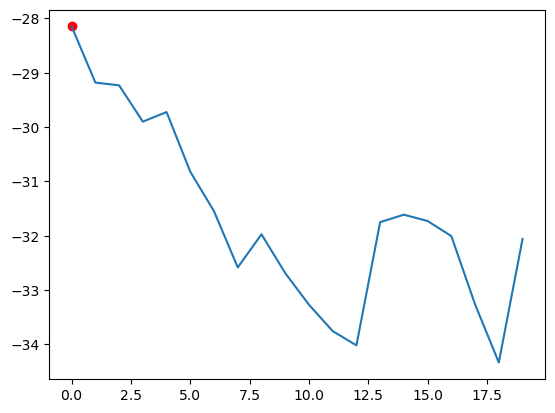

In [101]:
plt.plot(X_test[60])
plt.scatter(np.argmax(X_test[60]), max(X_test[60]), c='r')
print(prediction[60])

[0.9940047]


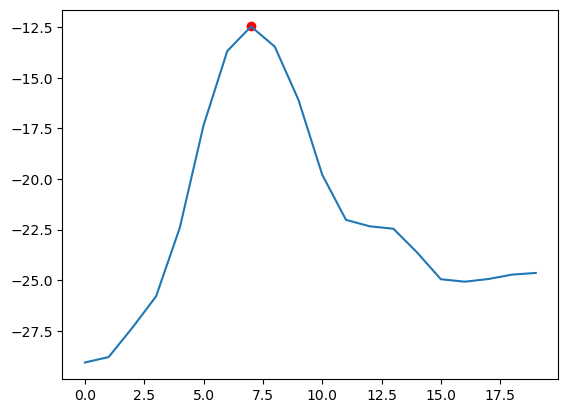

In [102]:
plt.plot(X_test[62])
plt.scatter(np.argmax(X_test[62]), max(X_test[62]), c='r')
print(prediction[62])

In [103]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
